# Analisis Data Nilai Akhir Mahasiswa Peternakan

**Load Library**

In [1]:
# Import necessary libraries
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Connect to MySQL Database**

In [2]:
# Establish a connection to the MySQL database
cnx = mysql.connector.connect(
    user='root', 
    password='', 
    host='localhost', 
    database='peternakan'
)

# Create a cursor object
cursor = cnx.cursor()

**Fetch Data from MySQL**

In [3]:
cursor.execute("SELECT * FROM peternakan")
data = cursor.fetchall()
# Get the column names
column_names = [desc[0] for desc in cursor.description]

**Convert Data to a Dictionary**

In [5]:
data_dict = [dict(zip(column_names, row)) for row in data]

Select some column

In [6]:
df = pd.DataFrame(data_dict, columns=['nim', 'nama', 'matakuliah', 'nilai_akhir','nilai_mutu'])

**Data Nilai yang tidak Valid**

In [7]:
TL_grades = df[df['nilai_akhir'] == 0.00]

In [8]:
TL_grades

,nim,nama,matakuliah,nilai_akhir,nilai_mutu
18,220311008,MOHAMAD DEKI KURNIAWAN,Biologi,0.00,TL
49,210311017,ALI KALMANI,Genetika,0.00,TL
133,210311017,ALI KALMANI,Reproduksi Ternak dan IB,0.00,TL


**Remove Invalid Data Value**

In [9]:
df = df.drop(df[df['nilai_mutu'] == 'TL'].index)

In [10]:
a_grades = df[df['nilai_mutu'] == 'A']

In [11]:
b_grades = df[df['nilai_mutu'] == 'B']

In [12]:
c_grades = df[df['nilai_mutu'] == 'C']

In [13]:
d_grades = df[df['nilai_mutu'] == 'D']

In [14]:
e_grades = df[df['nilai_mutu'] == 'E']

In [15]:
invalid_grades = df[df['nilai_mutu'] == 'TL']

In [16]:
invalid_grades

,nim,nama,matakuliah,nilai_akhir,nilai_mutu


**Tampilkan 5 data mahasiswa dengan nilai A**

In [17]:
a_grades.head()

,nim,nama,matakuliah,nilai_akhir,nilai_mutu
2,210311003,RISNAENI ADHARI,Bahan Pakan dan Formulasi,85.10,A
4,210311005,FAIZAL DARMAWAN,Bahan Pakan dan Formulasi,85.30,A
8,210311016,ASEF THRIANA NUGRAHA PUTRA,Bahan Pakan dan Formulasi,86.00,A
10,210311018,FIRMAN ALFARIZI PUTRA,Bahan Pakan dan Formulasi,85.10,A
12,220311001,ZHANUBHA CINTA AURELLINE,Biologi,91.10,A


**Tampilkan 5 data mahasiswa dengan nilai B**

In [18]:
b_grades.head()

,nim,nama,matakuliah,nilai_akhir,nilai_mutu
0,210311001,NURWAHIDIN NUGRAHA,Bahan Pakan dan Formulasi,77.65,B
1,210311002,HABIBI,Bahan Pakan dan Formulasi,84.35,B
3,210311004,MOHAMAD RIZKI HERDIANSYAH,Bahan Pakan dan Formulasi,81.55,B
5,210311006,DHARMAWAN YUDHA EKAPAMUJI,Bahan Pakan dan Formulasi,81.85,B
6,210311011,NUR FAUZY LUKMAN,Bahan Pakan dan Formulasi,78.80,B


**Tampilkan 5 data teratas mahasiswa dengan nilai C**

In [20]:
c_grades.head()

,nim,nama,matakuliah,nilai_akhir,nilai_mutu
40,210311001,NURWAHIDIN NUGRAHA,Genetika,65.25,C
46,210311011,NUR FAUZY LUKMAN,Genetika,68.25,C
47,210311015,ADE IMAN,Genetika,60.00,C
52,200311001,FAJAR AMIR,Ilmu Teknologi Daging dan,66.00,C
54,200311003,NIZAM ARQOTH,Ilmu Teknologi Daging dan,69.00,C


**Tampilkan 5 data teratas mahasiswa dengan nilai D**

In [21]:
d_grades.head()

,nim,nama,matakuliah,nilai_akhir,nilai_mutu
9,210311017,ALI KALMANI,Bahan Pakan dan Formulasi,55.35,D


**Tampilkan 5 data teratas mahasiswa dengan nilai E**

In [22]:
e_grades.head()

,nim,nama,matakuliah,nilai_akhir,nilai_mutu
37,210311017,ALI KALMANI,Dasar-dasar Manajemen,1.00,E
121,210311017,ALI KALMANI,Manajemen Agribisnis,10.00,E


**Hitung jumlah per Nilai Mutu**

In [23]:
total_a=df[df['nilai_mutu'] == 'A'].shape[0]

In [24]:
total_b=df[df['nilai_mutu'] == 'B'].shape[0]

In [25]:
total_c=df[df['nilai_mutu'] == 'C'].shape[0]

In [26]:
total_d=df[df['nilai_mutu'] == 'D'].shape[0]

In [27]:
total_e=df[df['nilai_mutu'] == 'E'].shape[0]

**Total Mahasiswa dengan nilai A**

In [28]:
total_a

68

**Total Mahasiswa dengan nilai B**

In [29]:
total_b

49

**Total Mahasiswa dengan nilai C**

In [30]:
total_c

13

**Total Mahasiswa dengan nilai D**

In [31]:
total_d

1

**Total Mahasiswa dengan nilai E**

In [32]:
total_e

2

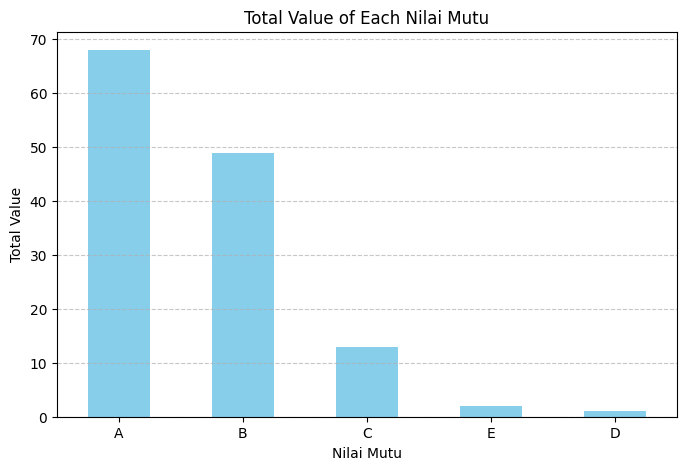

In [35]:
nilai_mutu_counts = df['nilai_mutu'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
nilai_mutu_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Nilai Mutu')
plt.ylabel('Total Value')
plt.title('Total Value of Each Nilai Mutu')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

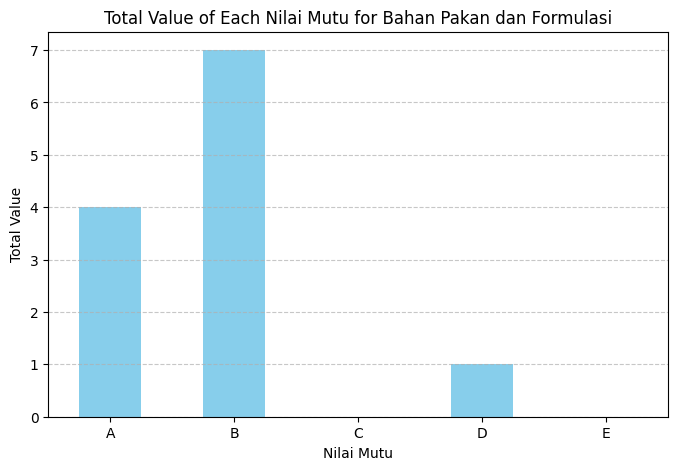

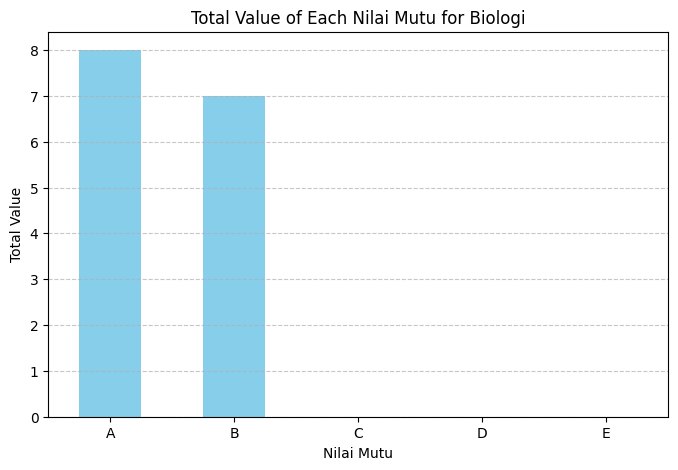

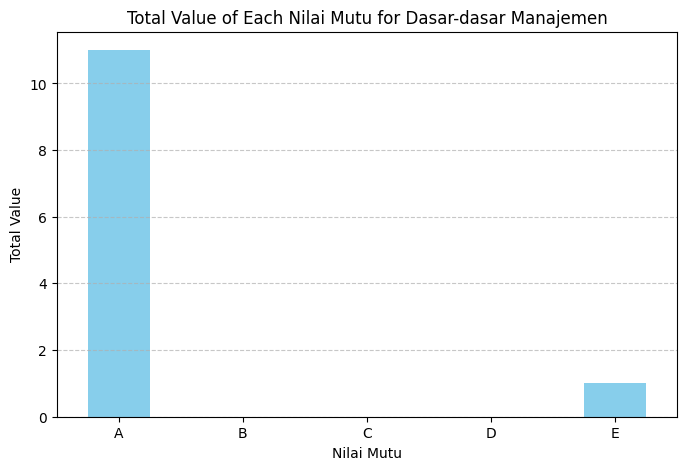

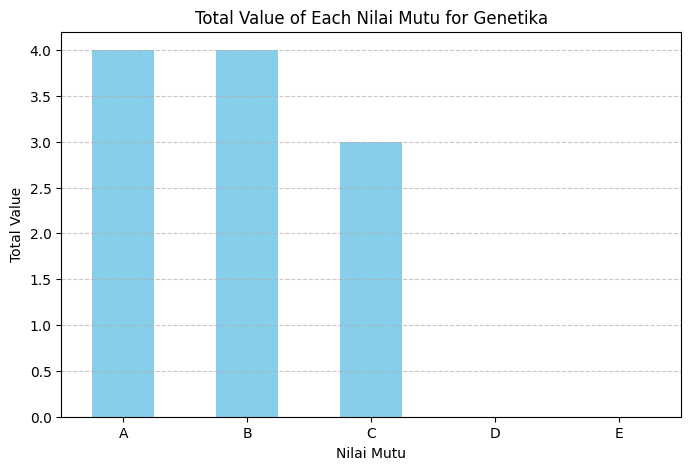

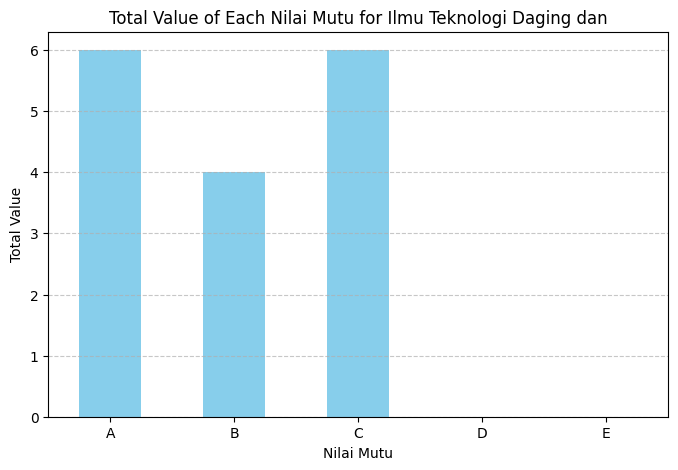

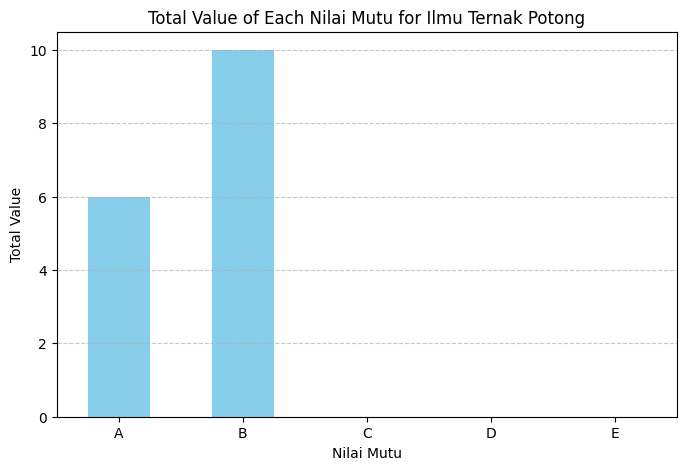

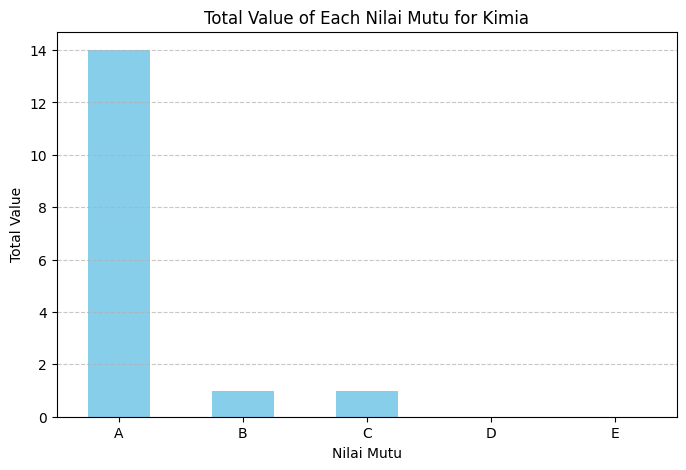

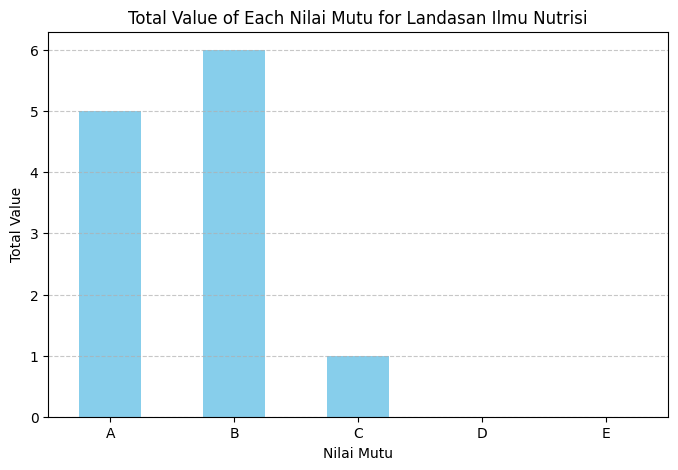

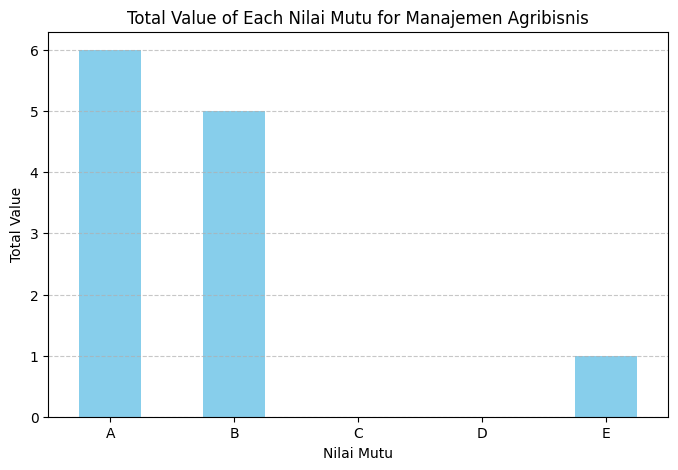

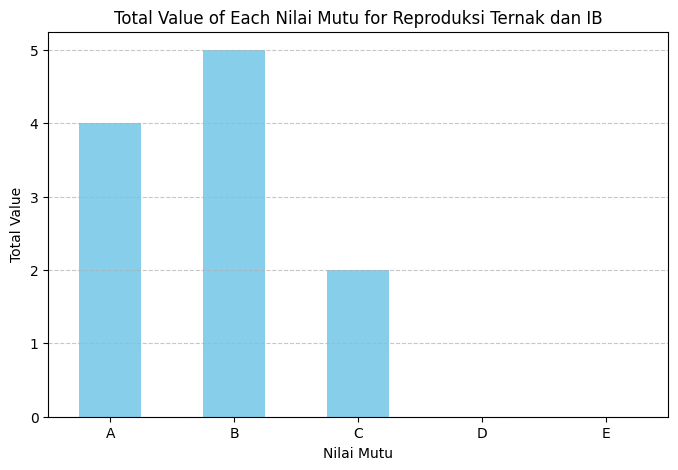

In [36]:
grouped_counts = df.groupby(['matakuliah', 'nilai_mutu']).size().unstack(fill_value=0)

# Plotting the bar chart for each Matakuliah
for matakuliah in grouped_counts.index:
    plt.figure(figsize=(8, 5))
    grouped_counts.loc[matakuliah].plot(kind='bar', color='skyblue')
    plt.xlabel('Nilai Mutu')
    plt.ylabel('Total Value')
    plt.title(f'Total Value of Each Nilai Mutu for {matakuliah}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()